# Haber Kategorilerini Sınıflandırma

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:

PATH_ROOT = r'../' 

def load_data(path):
    with open(PATH_ROOT + path, 'rb') as handle:
        dataset = pickle.load(handle)
    return dataset

## Kelime İşlemleri

In [ ]:
with open(PATH_ROOT + 'vectors/interpress_news_category_tr_lite_train_cleaned_tfidf_word_2000.pkl', 'rb') as handle:
    word_tfidf = pickle.load(handle)

with open(PATH_ROOT + 'vectors/interpress_news_category_tr_lite_train_cleaned_tfidf_char_2000.pkl', 'rb') as handle:
    char_tfidf = pickle.load(handle)

## Temizlenmiş ve Test Veri Kümesini Yükleme

In [ ]:
df_train = load_data(r"contect/drive/MyDrive/datasets/interpress_news_category_tr_lite_train_cleaned.pkl")
df_test = load_data(r"contect/drive/MyDrive/datasets/interpress_news_category_tr_lite_test_cleaned.pkl")

## Kelime ve Karakter Dönüşümü

In [ ]:
train_tf_word_transformed = word_tfidf.transform(df_train['clean_content'])
train_tf_char_transformed = char_tfidf.transform(df_train['clean_content'])

test_tf_word_transformed = word_tfidf.transform(df_test['clean_content'])
test_tf_char_transformed = char_tfidf.transform(df_test['clean_content'])

tf_train_features = hstack([train_tf_word_transformed, train_tf_char_transformed])
tf_train_features.shape

(218880, 4000)

In [ ]:

clf = svm.SVC(kernel='linear', gamma='auto')
clf.fit(tf_train_features, df_train['category'])

filename = PATH_ROOT + 'models/interpress_news_category_tr_lite_classifier_svm_model_4000.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:

tf_test_featured = hstack([test_tf_word_transformed, test_tf_char_transformed])

clf.score(tf_test_featured, df_test['category'])

0.9366239652053142

## Model Değerlendirmesi

In [ ]:

y_pred = []
y_true = []

for i, news in enumerate(tqdm(df_test['clean_content'])):
    word_transformed_news = word_tfidf.transform([news])
    char_transformed_news = char_tfidf.transform([news])
    news_featured = hstack([word_transformed_news, char_transformed_news])
    result = clf.predict(news_featured)[0]
    y_pred.append(result)
    y_true.append(df_test['category'].iloc[i])


100%|██████████| 54721/54721 [12:35:47<00:00,  1.21it/s]  


## Sınıflandırma ve Görselleştirme

In [ ]:

labels = ["Kültür-Sanat","Ekonomi","Siyaset","Eğitim","Dünya","Spor","Teknoloji","Magazin","Sağlık","Gündem"]

print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

Kültür-Sanat       0.92      0.96      0.94     17491
     Ekonomi       0.94      0.94      0.94      9086
     Siyaset       0.92      0.87      0.89      2448
      Eğitim       0.90      0.90      0.90      2597
       Dünya       0.89      0.80      0.84      1816
        Spor       0.98      0.97      0.98      5975
   Teknoloji       0.95      0.95      0.95      7928
     Magazin       0.91      0.83      0.87      1461
      Sağlık       0.95      0.92      0.94      4766
      Gündem       0.97      0.92      0.95      1153

    accuracy                           0.94     54721
   macro avg       0.93      0.91      0.92     54721
weighted avg       0.94      0.94      0.94     54721



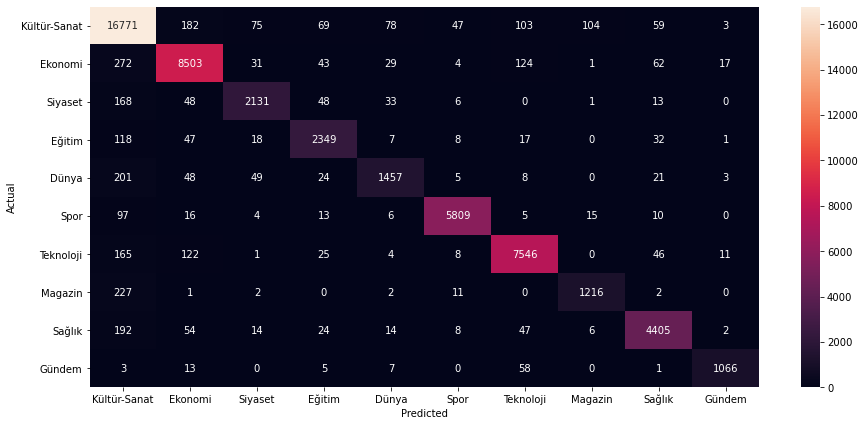

In [ ]:

conf_mat = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()